In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import gmean
import matplotlib.pyplot as plt

from utils.constants import EXP_RESULTS_PATH, DatasetType, ACCUMULATED_SHEET, POWER_SHEET
from nilmtk import STATS_CACHE
STATS_CACHE.store.close()

In [17]:
path_by_peak_consumption = '../exp_results_by_peak_consumption/processed_results_consum.xlsx'
path_by_point_count      = '../exp_results_by_point_count/processed_results_point.xlsx'


def plot_win_ratio(source_file, ds, dist_type, grouping_param, ax):
    sheet_name = f'{ds.path_str}_{dist_type}__by_{grouping_param}'
    if source_file == path_by_peak_consumption:
        limitation = 'равной максимальной загрузки сети'
    elif source_file == path_by_point_count:
        limitation = 'равного количества данных'
    
    df = pd.read_excel(source_file, sheet_name)
    grouping_data = df[grouping_param]
    win_percentage = df['win_percentage']
    count = df['count']
    
    if grouping_param == 'duration':
        grouping_data //= 60*60*24
    if grouping_param == 'key' and ds == DatasetType.IDEAL:
        rotation = 90
    else:
        rotation = 0

    barWidth = 0.7
    equal_steps = range(len(grouping_data))

    p1 = ax.bar(equal_steps, win_percentage, width=barWidth, label='асинхр')
    p2 = ax.bar(equal_steps, 100-win_percentage, bottom=win_percentage, width=barWidth, label='синхр')
    ax.bar_label(p2, labels=count, padding=3, rotation=rotation)
#     ax.axhline(y=10, color='black', linestyle=':')
#     ax.axhline(y=20, color='black', linestyle=':')
#     ax.axhline(y=30, color='black', linestyle=':')
#     ax.axhline(y=40, color='black', linestyle=':')
    ax.axhline(y=50, color='black', linestyle=':')

    ax.set_title(f'{ds.name} {dist_type} сгруппировано по {grouping_param}\nв ограничении {limitation}')
#         sheet_name + ' ' + source_file[15:30])
    
    ax.set_ylabel('процент побед')
    ax.set_xlabel(grouping_param)
    ax.set_xticks(equal_steps, labels=grouping_data, rotation=rotation)
    ax.set_yticks(range(0, 110, 10))
    ax.set_ylim([0, 120])

    leg = ax.legend(loc='lower right', framealpha=0.9)
    leg.get_frame().set_edgecolor('black')
    

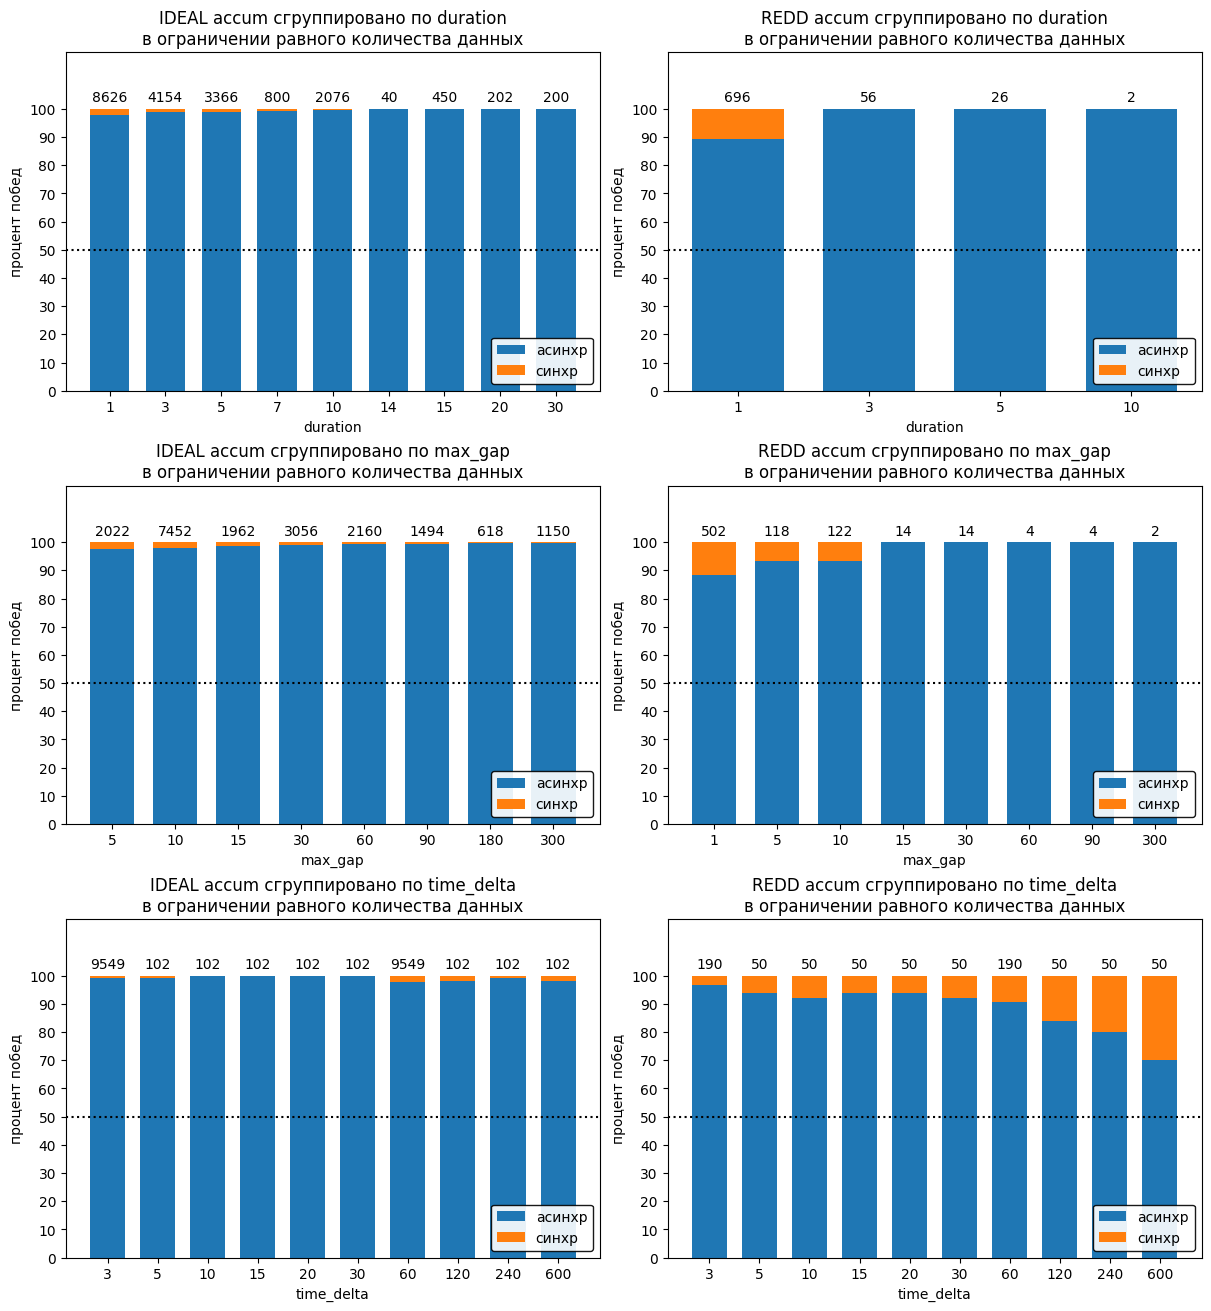

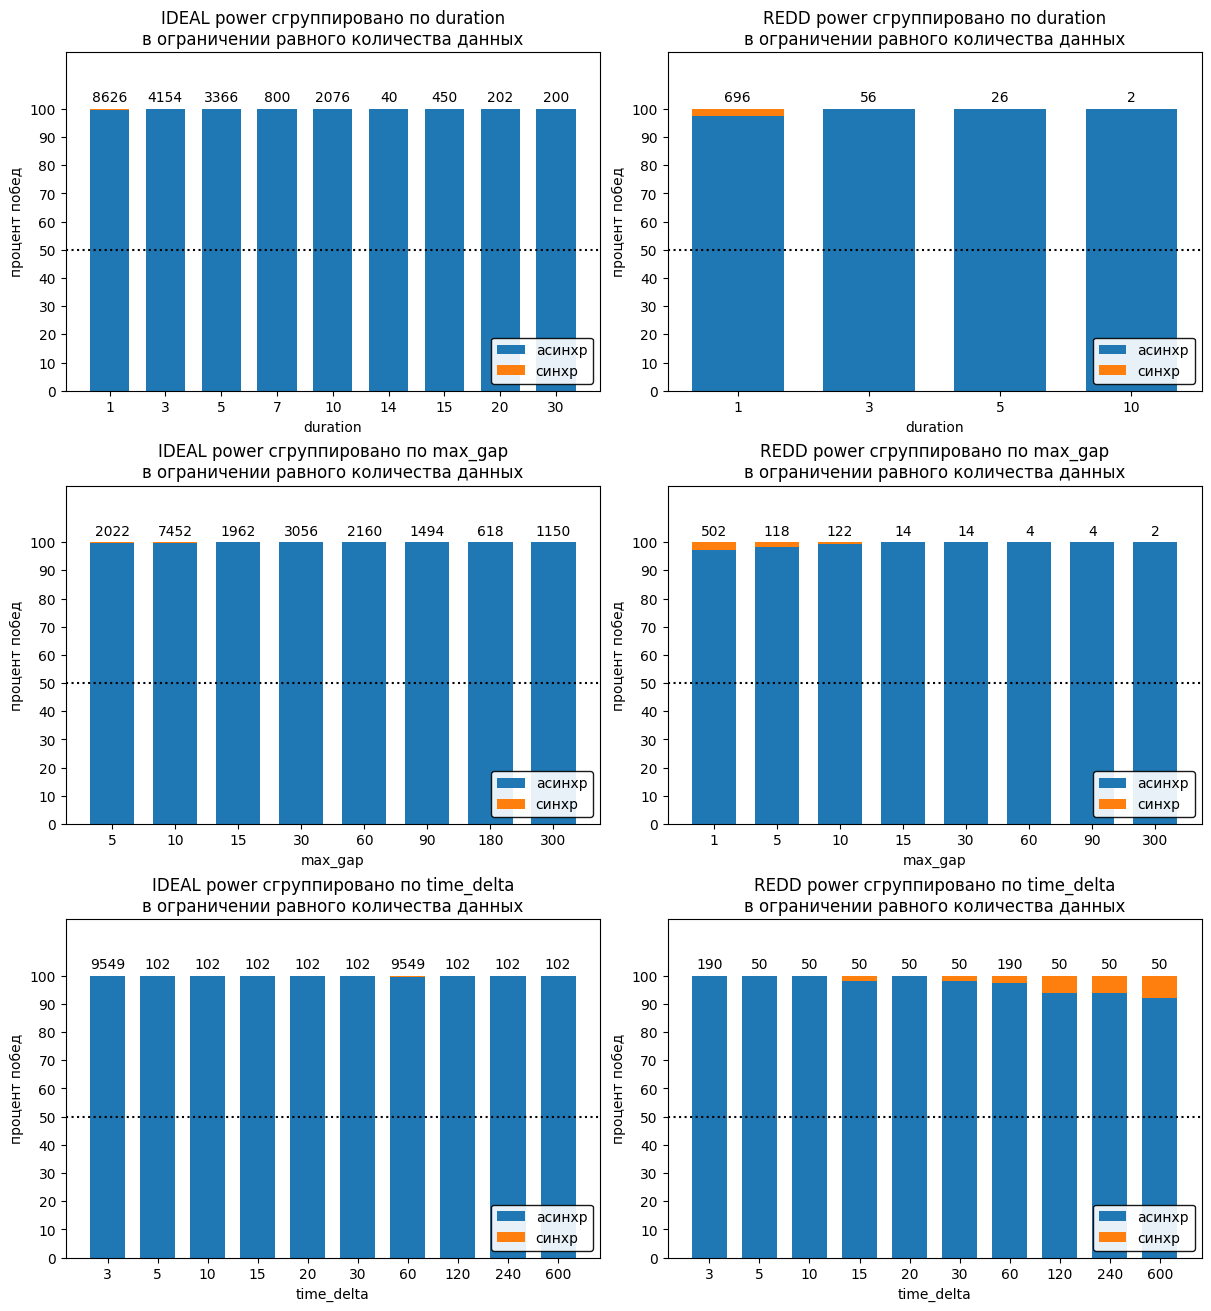

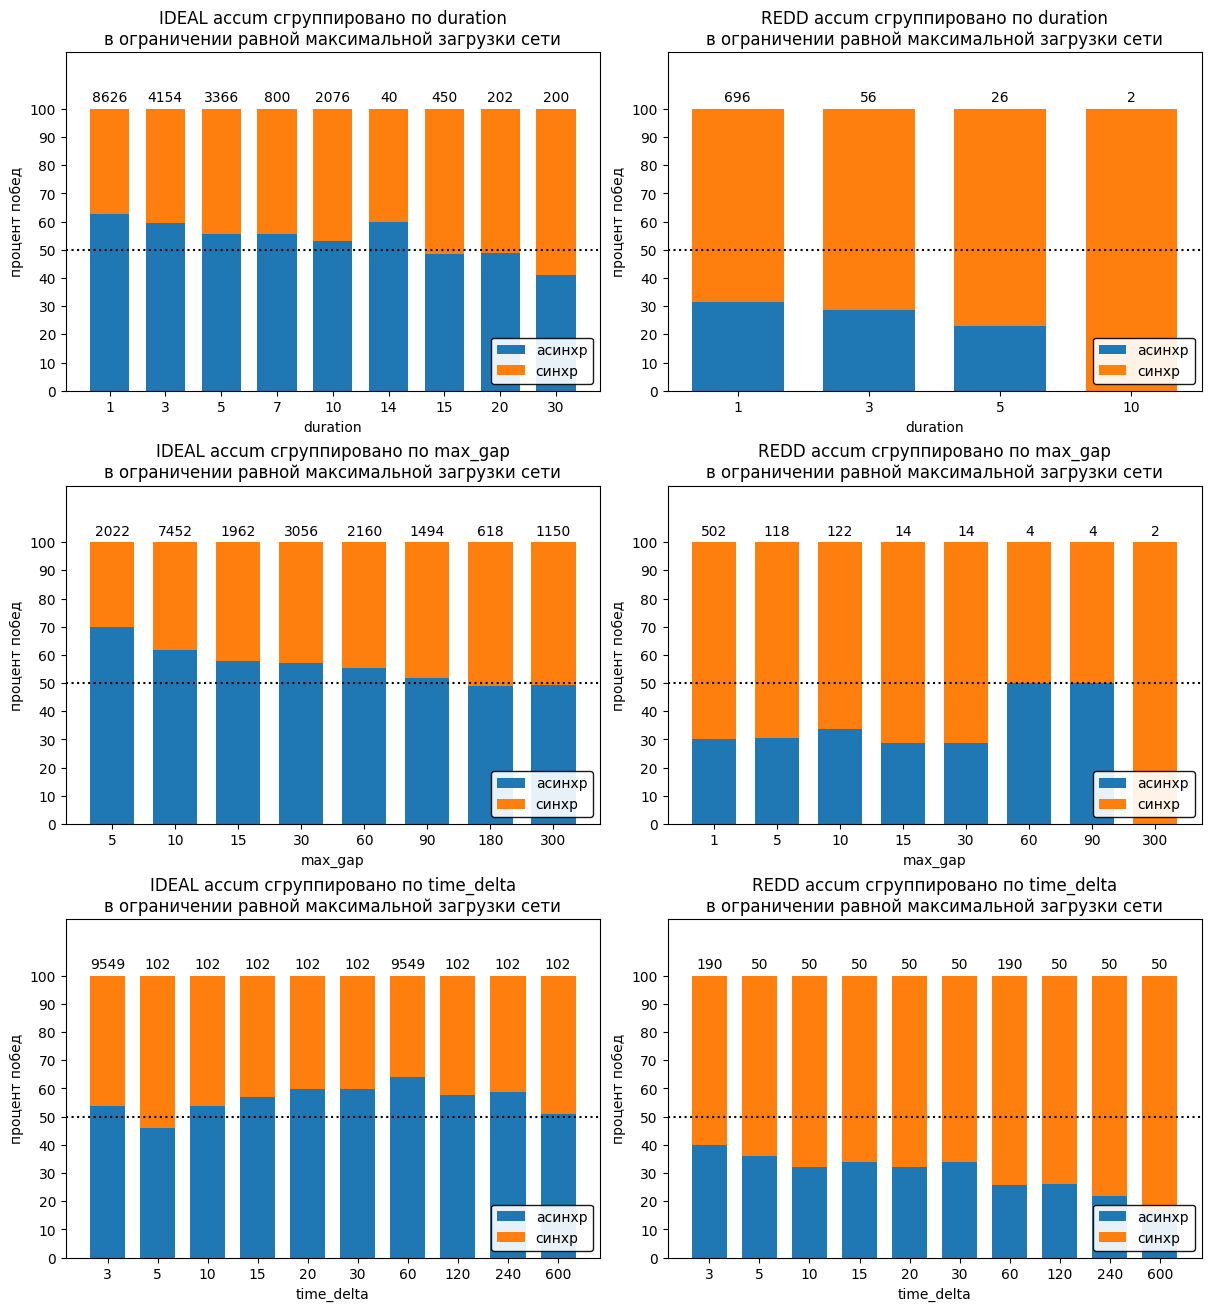

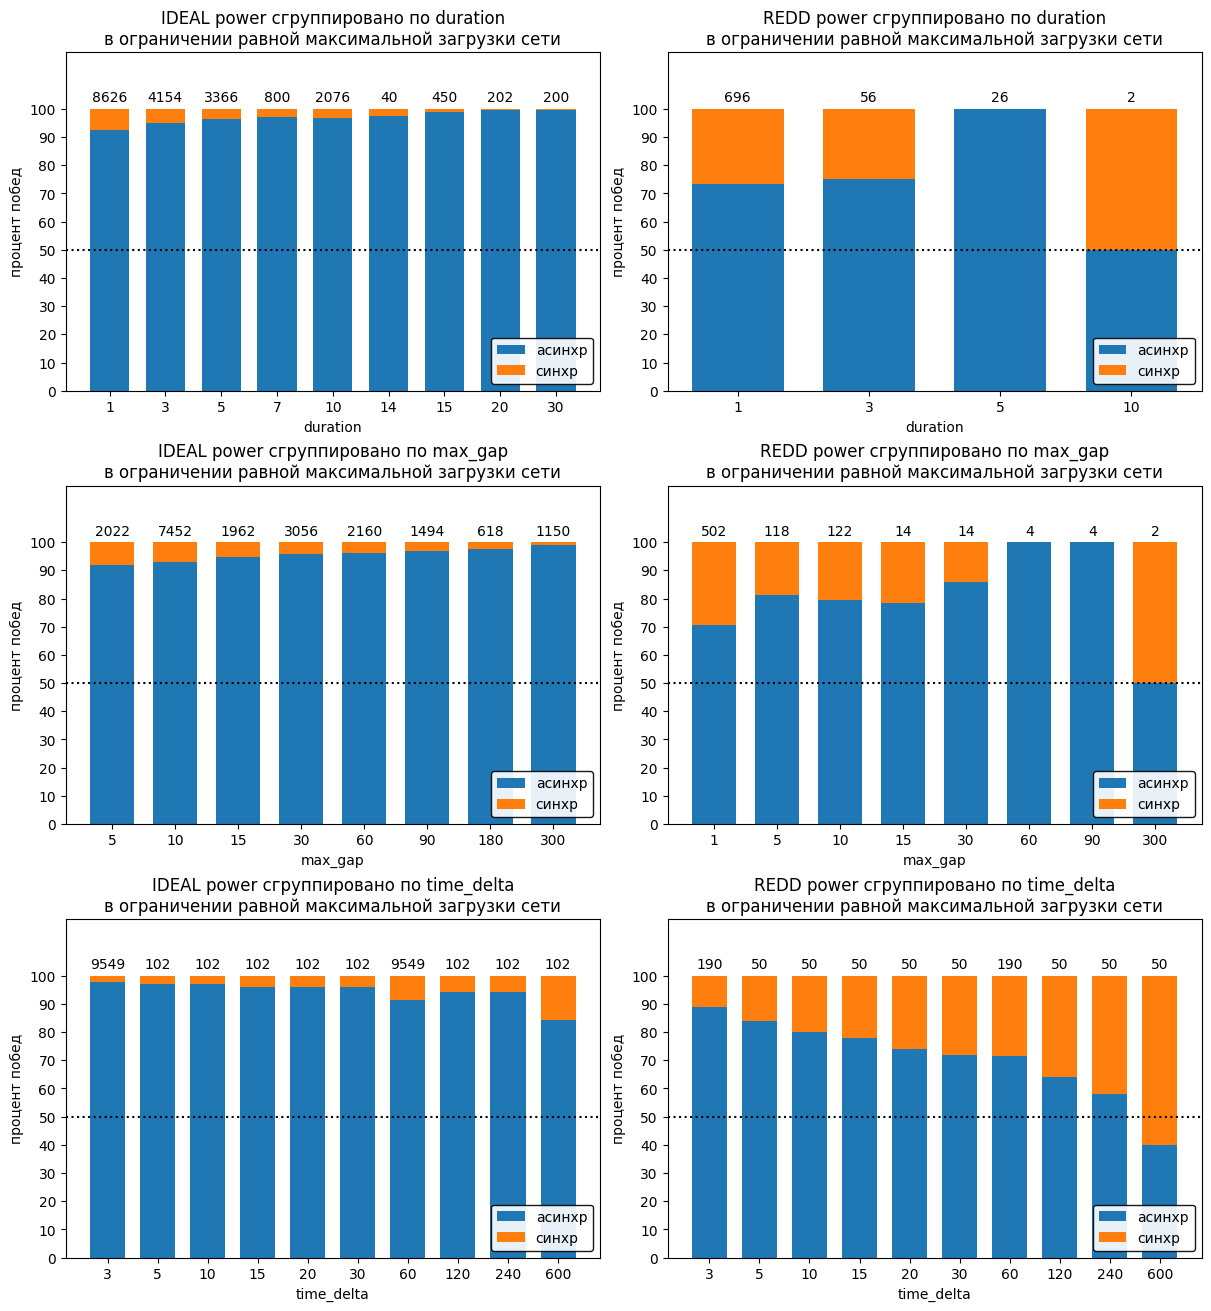

In [20]:
def a():
#     for source_file in [path_by_peak_consumption]:
    for source_file in [path_by_point_count, path_by_peak_consumption]:
        limitation = source_file.split('/')[1][15:]
#         for dist_type in ['accum']:
        for dist_type in ['accum', 'power']:
            fig, axs = plt.subplots(3, 2, figsize=(12, 13), constrained_layout=True)
#             for i, ds in enumerate([DatasetType.REDD]):
            for i, ds in enumerate([DatasetType.IDEAL, DatasetType.REDD]):
#                 for j, grouping_param in enumerate(['key', 'duration', 'max_gap', 'time_delta']):
                for j, grouping_param in enumerate(['duration', 'max_gap', 'time_delta']):
                    plot_win_ratio(source_file, ds, dist_type, grouping_param, axs[j, i])
            graph_name = f'../exp_results_graphs/{limitation}_{dist_type}.png'
#             plt.savefig(graph_name)
#             plt.close()
            plt.show()
#             return

a()

In [5]:
print(path_by_peak_consumption)
print(path_by_peak_consumption.split('/')[1][15:])

../exp_results_by_peak_consumption/processed_results_consum.xlsx
peak_consumption
